In [1]:
# by zheng dong
base_path = "C:/Users/junmi/Documents/XMUM/All Assignment/AIT202/Final Project"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import json
import mycvlib as cv
from PIL import Image
from skimage.transform import rescale
import cv2
import torch

In [3]:
def get_first_n_pairs(my_dict, n):
    new_dict = {}
    counter = 0
    for obj in my_dict:
        new_dict[obj] = my_dict[obj]
        counter += 1
        if counter >= n:
            return new_dict

def print_dict(my_dict):
     print(json.dumps(my_dict, indent=4, separators=(',', ': ')))

In [4]:
random.seed(87)
np.random.seed(87)

In [5]:
training_image_path = "\\coco2017\\train2017\\"
training_label_path = "\\coco2017\\annotations\\instances_train2017.json"

with open(base_path + training_label_path, 'r') as file:
    data = json.load(file)

In [6]:
number_of_images = len(data["images"])
print("number of images: " + str(number_of_images))

number of images: 118287


In [7]:
print(f"json keys: {data.keys()}")
print(f"images keys: {data['images'][0].keys()}")
print(f"annotation keys: {data['annotations'][0].keys()}")
print(f"categories keys: {data['categories'][0].keys()}")

json keys: dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])
images keys: dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id'])
annotation keys: dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])
categories keys: dict_keys(['supercategory', 'id', 'name'])


In [8]:
categories = {}
for idx,j in enumerate(data["categories"]):
    # categories[train_json_dataset["categories"][idx]['id']] = j['name']
    categories.update({data['categories'][idx]['id']:j['name']})

print(f"list of categories: {categories}")

list of categories: {1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant', 13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear', 24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag', 32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard', 37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove', 41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle', 46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon', 51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange', 56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut', 61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed', 67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse', 75: 'remote', 76: 'keyboard', 77: 'cel

In [9]:
# missing data

image_id_array = [image["id"] for image in data["images"]]
annotation_ids = np.unique([annotation["image_id"] for annotation in data["annotations"]], return_counts=False)

non_missing_image_ids = np.intersect1d(image_id_array, annotation_ids)
missing_image_ids = np.setdiff1d(image_id_array, annotation_ids)

print(f"number of images with annotations: {len(non_missing_image_ids)}")
print(f"number of images without annotations: {len(missing_image_ids)}")
print(f"percentage of missing data: {np.round(len(missing_image_ids) / number_of_images * 100, 2)}%")

number of images with annotations: 117266
number of images without annotations: 1021
percentage of missing data: 0.86%


In [10]:
cat_id2name = {cat["id"]:cat["name"] for cat in data["categories"]}
cat_name2id = {cat["name"]:cat["id"] for cat in data["categories"]}
image_id2file = { image['id']: image['file_name'] for image in data['images']}

In [11]:
images_label = dict()
for obj in data['annotations']:
    image_id = obj["image_id"]
    if image_id in images_label:
        images_label[image_id]["segmentation"].append(obj["segmentation"])
        images_label[image_id]["area"].append(obj["area"])
        images_label[image_id]["iscrowd"].append(obj["iscrowd"])
        images_label[image_id]["bbox"].append(obj["bbox"])
        images_label[image_id]["category_id"].append(obj["category_id"])
    else:
        label = {
            "segmentation": [obj["segmentation"]],
            "area": [obj["area"]],
            "iscrowd": [obj["iscrowd"]],
            "bbox": [obj["bbox"]],
            "category_id": [obj["category_id"]]
        }
        images_label[image_id] = label


In [12]:
data_new = {}
for id in image_id_array:
    if id not in annotation_ids:
        data_new[id] = {
            "file_name": image_id2file[id],

            "annotations": []
        }
    else:
        annotations_array = []

        for i in range(len(images_label[id]["bbox"])):
            dict_temp = {
                "bbox": images_label[id]["bbox"][i],
                "category_id": images_label[id]["category_id"][i],
                "category_name": categories[images_label[id]["category_id"][i]]
            }
            annotations_array.append(dict_temp)

        data_new[id] = {
            "file_name": image_id2file[id],

            "annotations": annotations_array
        }

In [13]:
dict_temp = get_first_n_pairs(data_new, 3)
print_dict(dict_temp)

{
    "391895": {
        "file_name": "000000391895.jpg",
        "annotations": [
            {
                "bbox": [
                    359.17,
                    146.17,
                    112.45,
                    213.57
                ],
                "category_id": 4,
                "category_name": "motorcycle"
            },
            {
                "bbox": [
                    339.88,
                    22.16,
                    153.88,
                    300.73
                ],
                "category_id": 1,
                "category_name": "person"
            },
            {
                "bbox": [
                    471.64,
                    172.82,
                    35.92,
                    48.1
                ],
                "category_id": 1,
                "category_name": "person"
            },
            {
                "bbox": [
                    486.01,
                    183.31,
                    30.63,
          

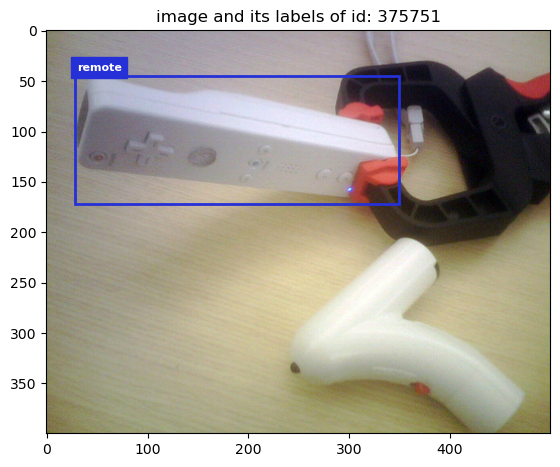

In [14]:
def show_image_and_labels(image_id):
    image_3d, image_2d = cv.open_image(base_path + training_image_path + data_new[image_id]["file_name"])
    fig, ax = plt.subplots(figsize=(6.5, 6.5))

    plt.imshow(image_3d)

    for i in range(len(data_new[image_id]["annotations"])):
        color = (random.random(),random.random(),random.random())
        bbox = data_new[image_id]["annotations"][i]["bbox"]
        ax.add_patch(plt.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], fill=False, edgecolor=(color),linewidth=2))
        ax.text(bbox[0] + 2, bbox[1] - 5, data_new[image_id]["annotations"][i]["category_name"], color='white', fontsize=8, weight='bold', backgroundcolor=color)

    plt.title(f"image and its labels of id: {image_id}")

    plt.show()

show_image_and_labels(np.random.choice(image_id_array))

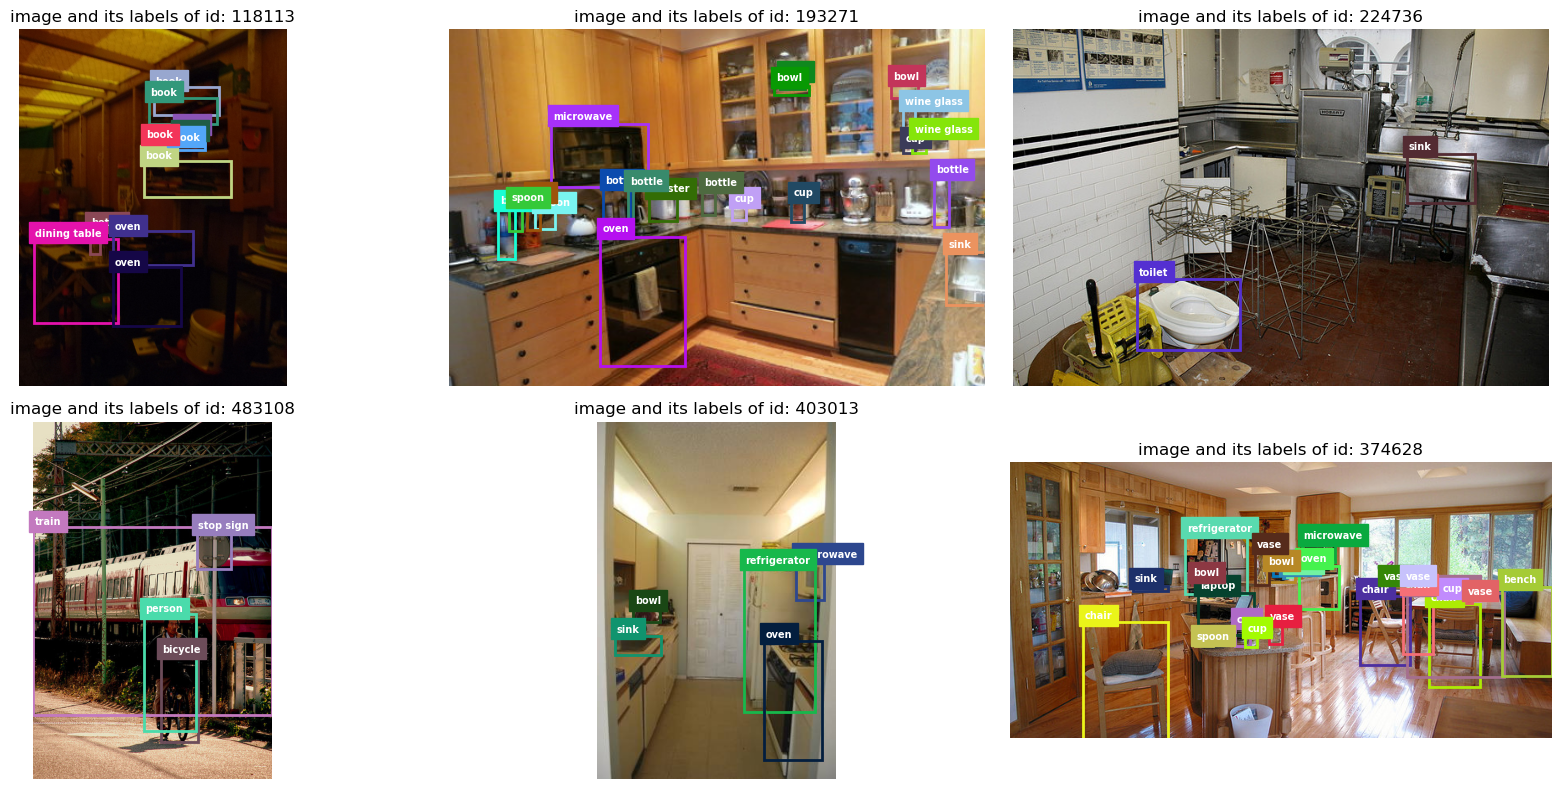

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(17, 8))
keys_temp = list(data_new.keys())[10:16]

for j in range(6):
    id = keys_temp[j]
    a = j // 3
    b = j % 3

    image_3d, image_2d = cv.open_image(base_path + training_image_path + data_new[id]["file_name"])
    ax[a, b].imshow(image_3d)
    ax[a, b].axis("off")
    ax[a, b].set_title(f"image and its labels of id: {id}")

    for i in range(len(data_new[id]["annotations"])):
        color = (random.random(),random.random(),random.random())
        bbox = data_new[id]["annotations"][i]["bbox"]
        ax[a, b].add_patch(plt.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], fill=False, edgecolor=(color),linewidth=2))
        ax[a, b].text(bbox[0] + 2, bbox[1] - 5, categories[data_new[id]["annotations"][i]["category_id"]], color='white', fontsize=7, weight='bold', backgroundcolor=color)

plt.tight_layout()
plt.show()

frequency of each item:

person: 262465
car: 43867
chair: 38491
book: 24715
bottle: 24342
cup: 20650
dining table: 15714
bowl: 14358
traffic light: 12884
handbag: 12354
umbrella: 11431
bird: 10806
boat: 10759
truck: 9973
bench: 9838
sheep: 9509
banana: 9458
kite: 9076
motorcycle: 8725
backpack: 8720
potted plant: 8652
cow: 8147
wine glass: 7913
carrot: 7852
knife: 7770
broccoli: 7308
donut: 7179
bicycle: 7113
skis: 6646
vase: 6613
horse: 6587
tie: 6496
cell phone: 6434
orange: 6399
cake: 6353
sports ball: 6347
clock: 6334
suitcase: 6192
spoon: 6165
surfboard: 6126
bus: 6069
apple: 5851
pizza: 5821
tv: 5805
couch: 5779
remote: 5703
sink: 5610
skateboard: 5543
elephant: 5513
dog: 5508
fork: 5479
zebra: 5303
airplane: 5135
giraffe: 5131
laptop: 4970
tennis racket: 4812
teddy bear: 4793
cat: 4768
train: 4571
sandwich: 4373
bed: 4192
toilet: 4157
baseball glove: 3747
oven: 3334
baseball bat: 3276
hot dog: 2918
keyboard: 2855
snowboard: 2685
frisbee: 2682
refrigerator: 2637
mouse: 2262
stop 

Text(0.5, 1.0, 'top 10 least common objects')

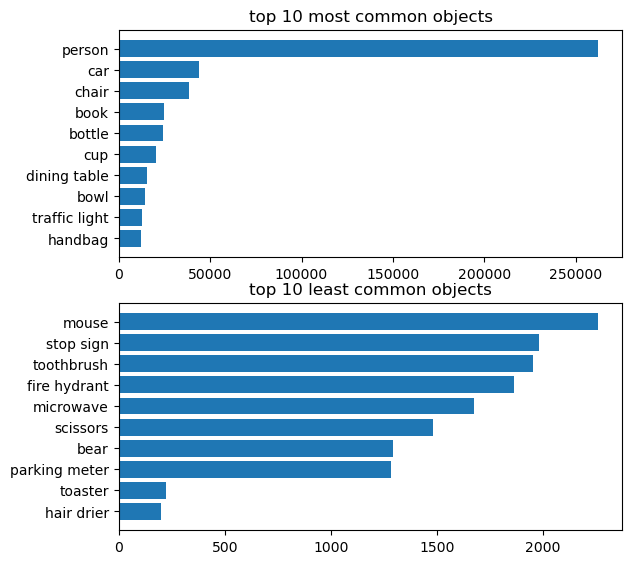

In [16]:
category_id_array = []
for id in image_id_array:
    for j in range(len(data_new[id]["annotations"])):
        category_id_array.append(data_new[id]["annotations"][j]["category_name"])

category_name_array, frequency_array = np.unique(category_id_array, return_counts=True)

sorted_indeces = np.argsort(frequency_array)
sorted_category_name_array = category_name_array[sorted_indeces]
sorted_frequency_array = frequency_array[sorted_indeces]

print("frequency of each item:\n")
for i in range(len(sorted_category_name_array) - 1, -1, -1):
    print(f"{sorted_category_name_array[i]}: {sorted_frequency_array[i]}")

plt.figure(figsize=(6.5, 6.5))

plt.subplot(2, 1, 1)
plt.barh(np.arange(len(sorted_frequency_array))[-10:], sorted_frequency_array[-10:])
plt.yticks(np.arange(len(sorted_frequency_array))[-10:], labels=sorted_category_name_array[-10:])
plt.title("top 10 most common objects")

plt.subplot(2, 1, 2)
plt.barh(np.arange(len(sorted_frequency_array))[:10], sorted_frequency_array[:10])
plt.yticks(np.arange(len(sorted_frequency_array))[:10], labels=sorted_category_name_array[:10])
plt.title("top 10 least common objects")


In [17]:
# This code obtains the dimensions of every image and saves it as image_dimensions.npy. Commented because it is very slow

# width_array = np.zeros(len(image_id_array))
# height_array = np.zeros(len(image_id_array))

# for i in range(len(image_id_array)):
#     print(i / number_of_images)
#     id = image_id_array[i]
#     image_3d = cv2.imread(base_path + training_image_path + data_new[id]["file_name"])
    
#     width = image_3d.shape[1]
#     height = image_3d.shape[0]

#     width_array[i] = width
#     height_array[i] = height

# image_dimensions_array = np.concatenate((np.array([width_array]), np.array([height_array])))
# np.save("image_dimensions.npy", image_dimensions_array)

Text(0.5, 1.0, 'scatterplot of image dimensions')

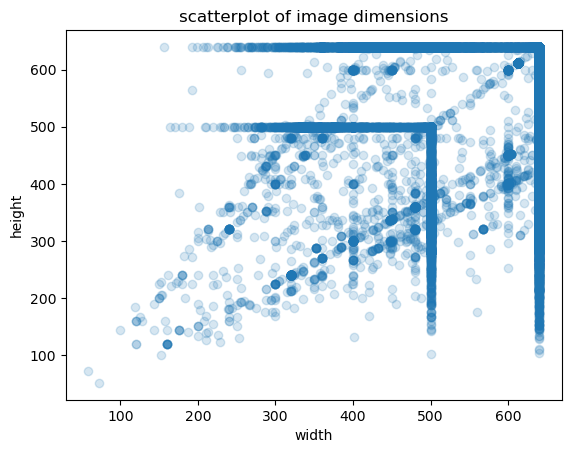

In [18]:
image_dimensions_array = np.load("image_dimensions.npy")
width_array = image_dimensions_array[0]
height_array = image_dimensions_array[1]

plt.scatter(width_array, height_array, alpha=0.18)
plt.xlabel("width")
plt.ylabel("height")
plt.title("scatterplot of image dimensions")

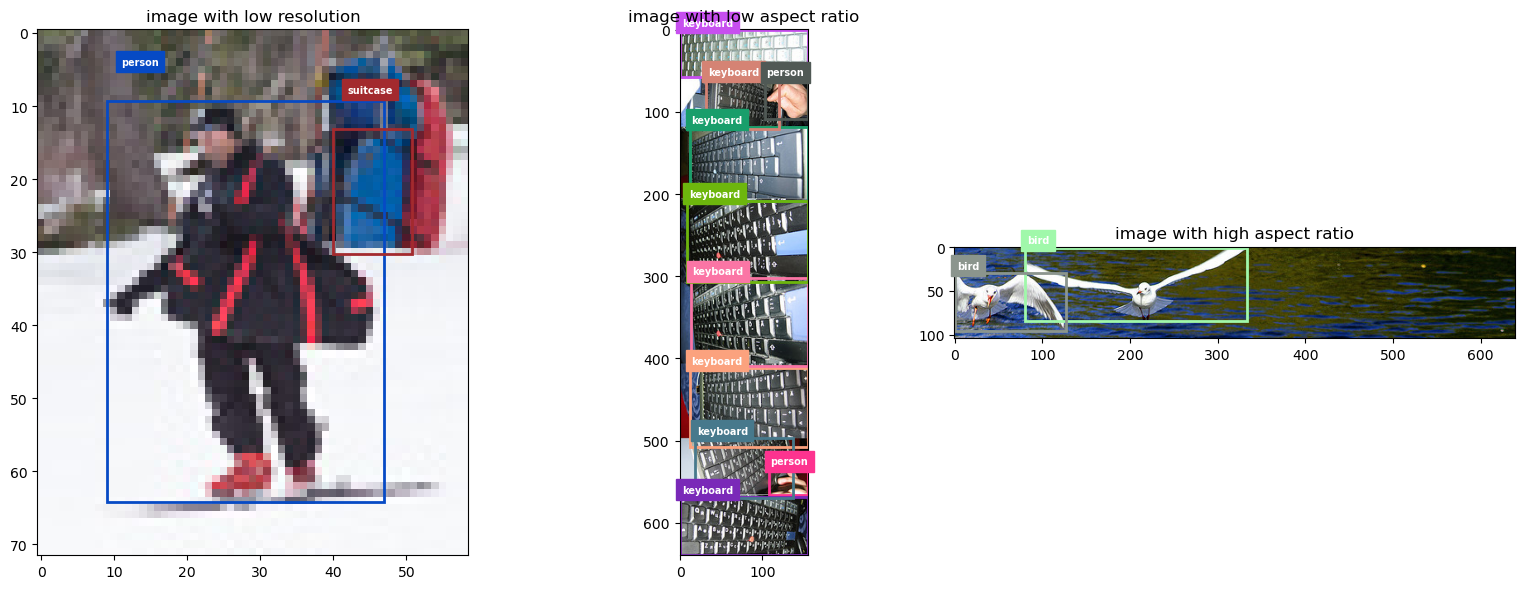

In [19]:
aspect_ratio_array = np.zeros(number_of_images)
for i in range(number_of_images):
    aspect_ratio_array[i] = width_array[i] / height_array[i]

temp_id_array = [image_id_array[np.argmin(width_array)], image_id_array[np.argmin(aspect_ratio_array)], image_id_array[np.argmax(aspect_ratio_array)]]
temp_labels = ["image with low resolution", "image with low aspect ratio", "image with high aspect ratio"]

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
for j in range(3):
    id = temp_id_array[j]

    image_3d, image_2d = cv.open_image(base_path + training_image_path + data_new[id]["file_name"])
    ax[j].imshow(image_3d)
    ax[j].set_title(temp_labels[j])

    for i in range(len(data_new[id]["annotations"])):
        color = (random.random(),random.random(),random.random())
        bbox = data_new[id]["annotations"][i]["bbox"]
        ax[j].add_patch(plt.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], fill=False, edgecolor=(color),linewidth=2))
        ax[j].text(bbox[0] + 2, bbox[1] - 5, categories[data_new[id]["annotations"][i]["category_id"]], color='white', fontsize=7, weight='bold', backgroundcolor=color)

plt.tight_layout()
plt.show()


In [20]:
bbox_area_array = []
temp_id_array = []

for i in range(number_of_images):
    id = image_id_array[i]
    for j in range(len(data_new[id]["annotations"])):
        area = data_new[id]["annotations"][j]["bbox"][2] * data_new[id]["annotations"][j]["bbox"][3]
        temp_id_array.append(id)
        bbox_area_array.append(area)

print(np.argmax(bbox_area_array))
print(temp_id_array[22884])

22884
548550


In [21]:
temp_id_array = []
temp_cat_name_array = []

for i in range(number_of_images):
    id = image_id_array[i]
    width = width_array[i]
    height = height_array[i]

    for j in range(len(data_new[id]["annotations"])):
        bbox = data_new[id]["annotations"][j]["bbox"]
        max_bbox = [0, 0, width, height]
        category = data_new[id]["annotations"][j]["category_name"]
        if (np.sum(np.equal(bbox, max_bbox)) == 4 and not (category == "dining table" or category == "person" or category == "bowl" or category == "bed")):
            temp_id_array.append(id)
            temp_cat_name_array.append(data_new[id]["annotations"][j]["category_name"])

print((temp_id_array))
print(temp_cat_name_array)

[500859, 344271, 58001, 492886, 566757, 274657, 47516, 13991, 189939, 440359, 446354, 459749, 85390, 402903, 7722, 380979, 355124, 208340, 527670, 216014, 499402, 36077, 343481, 254838, 319687, 339852, 290234, 483374, 209755, 415874, 331764, 382668, 245089, 530848, 129192, 101194, 507875, 468214, 224128, 472314, 472314, 332439, 490959, 116334, 169701, 222983, 68738, 554737, 535852, 524389, 565546, 250533, 331419, 344597, 469614, 117445, 221394, 252873, 13922, 249536, 382287, 380319, 485616, 229603, 463883, 374490, 283502, 73197, 228994, 145629, 163615, 192524, 465414, 183690, 415174, 372319, 220834, 349750, 329147, 259557, 31567, 458228, 163186, 189975, 296560, 246396, 89848, 295776, 69205, 103936, 306342, 131587, 59581, 274763, 246736, 326433, 345883, 205650, 420461, 205440, 442680, 66127, 110723, 57016, 431484, 178193, 186451, 341369, 555156, 552520, 222305, 234948, 109036, 146878, 194969, 544089, 202070, 517070]
['bench', 'train', 'couch', 'chair', 'train', 'car', 'bus', 'oven', 'si

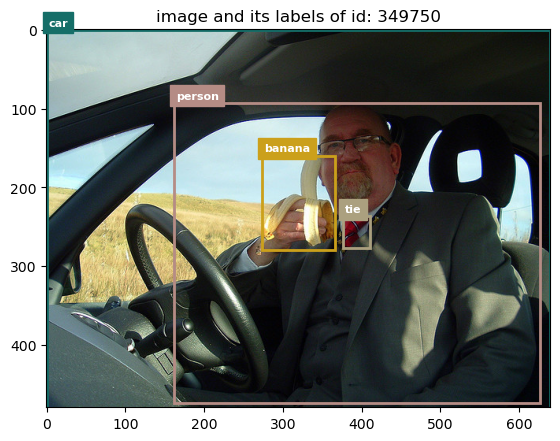

In [22]:
show_image_and_labels(np.random.choice(temp_id_array))

In [23]:
a, b = np.unique(temp_cat_name_array, return_counts=True)
print(a[np.argsort(b)])
print(b[np.argsort(b)])

['cup' 'potted plant' 'motorcycle' 'laptop' 'keyboard' 'dog' 'book' 'tv'
 'bicycle' 'apple' 'backpack' 'bear' 'microwave' 'boat' 'banana' 'cat'
 'airplane' 'bench' 'giraffe' 'pizza' 'refrigerator' 'sink' 'chair' 'bus'
 'truck' 'oven' 'couch' 'train' 'car']
[ 1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  4  4  4  5  5  6  6
  8  9 12 15 18]


{'file_name': '000000548550.jpg', 'annotations': [{'bbox': [0.0, 0.0, 640.0, 640.0], 'category_id': 67, 'category_name': 'dining table'}, {'bbox': [398.38, 0.0, 149.58, 24.45], 'category_id': 51, 'category_name': 'bowl'}, {'bbox': [24.09, 112.94, 591.82, 335.81], 'category_id': 58, 'category_name': 'hot dog'}, {'bbox': [25.22, 109.82, 587.98, 340.49], 'category_id': 54, 'category_name': 'sandwich'}]}


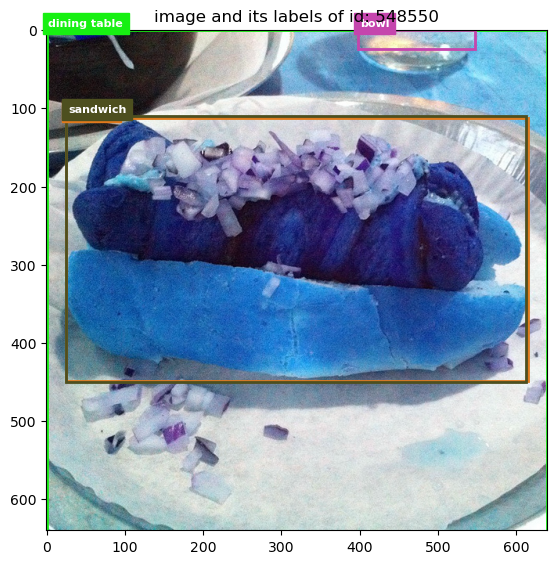

In [24]:
image_id = 548550
print(data_new[image_id])
image_3d = cv2.imread(base_path + training_image_path + data_new[image_id]["file_name"])
fig, ax = plt.subplots(figsize=(6.5, 6.5))

plt.imshow(image_3d)

for i in range(len(data_new[image_id]["annotations"])):
    color = (random.random(),random.random(),random.random())
    bbox = data_new[image_id]["annotations"][i]["bbox"]
    ax.add_patch(plt.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], fill=False, edgecolor=(color),linewidth=2))
    ax.text(bbox[0] + 2, bbox[1] - 5, data_new[image_id]["annotations"][i]["category_name"], color='white', fontsize=8, weight='bold', backgroundcolor=color)

plt.title(f"image and its labels of id: {image_id}")

plt.show()

[224736, 542145, 242611, 269105, 294832, 144941, 173350, 60760, 324266, 360772, 191381, 111076, 258985, 125059, 455483, 436141, 326781, 138079, 192440, 256668, 364521, 364521, 463836, 463836, 241876, 156832, 270721, 540763, 32907, 75051, 80172, 39743, 39743, 265574, 378709, 523297, 431197, 430287, 271712, 304355, 193251, 216320, 209322, 169598, 463610, 538589, 134649, 279024, 292810, 292810, 292810, 292810, 186074, 444672, 444672, 223122, 359959, 425035, 402330, 456732, 10643, 103306, 329534, 447038, 550597, 374707, 531111, 577564, 176275, 220446, 195897, 460944, 107427, 126941, 247184, 12323, 363830, 168626, 313063, 441196, 214727, 310532, 366867, 225847, 42383, 400123, 567220, 47559, 473623, 52087, 52087, 480215, 306444, 69494, 433919, 287151, 299550, 549817, 184557, 162156, 127880, 570138, 557677, 535643, 535643, 251075, 184700, 304389, 418070, 576576, 445812, 253441, 416184, 416184, 575946, 145523, 290078, 8267, 256156, 372495, 548201, 305464, 155617, 554900, 262514, 22963, 302185,

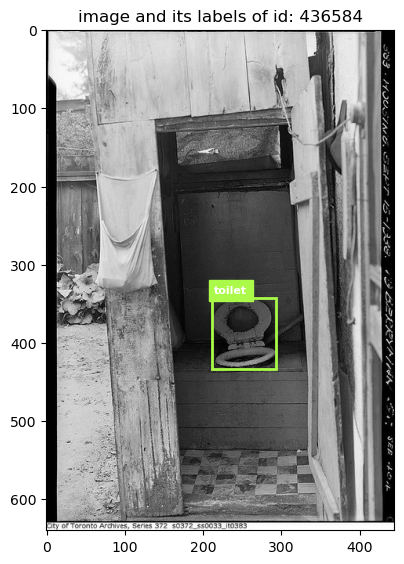

In [25]:
a = []
for id in image_id_array:
    for j in range(len(data_new[id]["annotations"])):
        if data_new[id]["annotations"][j]["category_name"] == "toilet":
            a.append(id)

print(a)

image_id = np.random.choice(a)
image_3d, image_2d = cv.open_image(base_path + training_image_path + data_new[image_id]["file_name"])
fig, ax = plt.subplots(figsize=(6.5, 6.5))

plt.imshow(image_3d)

for i in range(len(data_new[image_id]["annotations"])):
    color = (random.random(),random.random(),random.random())
    bbox = data_new[image_id]["annotations"][i]["bbox"]
    ax.add_patch(plt.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], fill=False, edgecolor=(color),linewidth=2))
    ax.text(bbox[0] + 2, bbox[1] - 5, data_new[image_id]["annotations"][i]["category_name"], color='white', fontsize=8, weight='bold', backgroundcolor=color)

plt.title(f"image and its labels of id: {image_id}")

plt.show()

test data

In [26]:
temp_path = "\\coco2017\\annotations\\person_keypoints_train2017.json"

with open(base_path + temp_path, 'r') as file:
    data_captions = json.load(file)

print(data_captions.keys())

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])


In [27]:
print_dict(data_captions["images"][:5])
# print(len(data_captions["images"]))

[
    {
        "license": 3,
        "file_name": "000000391895.jpg",
        "coco_url": "http://images.cocodataset.org/train2017/000000391895.jpg",
        "height": 360,
        "width": 640,
        "date_captured": "2013-11-14 11:18:45",
        "flickr_url": "http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg",
        "id": 391895
    },
    {
        "license": 4,
        "file_name": "000000522418.jpg",
        "coco_url": "http://images.cocodataset.org/train2017/000000522418.jpg",
        "height": 480,
        "width": 640,
        "date_captured": "2013-11-14 11:38:44",
        "flickr_url": "http://farm1.staticflickr.com/1/127244861_ab0c0381e7_z.jpg",
        "id": 522418
    },
    {
        "license": 3,
        "file_name": "000000184613.jpg",
        "coco_url": "http://images.cocodataset.org/train2017/000000184613.jpg",
        "height": 336,
        "width": 500,
        "date_captured": "2013-11-14 12:36:29",
        "flickr_url": "http://farm3.staticfl

# Experiment

Experiments are done on the validation data, therefore validation images and labels are needed

In [28]:
validation_image_path = "\\coco2017\\val2017\\"
validation_label_path = "\\coco2017\\annotations\\instances_val2017.json"

with open(base_path + validation_label_path, 'r') as file:
    val_data = json.load(file)

Same as the data above, the validation data is preprocessed

In [29]:
val_image_id_array = [image["id"] for image in val_data["images"]]
annotation_ids = np.unique([annotation["image_id"] for annotation in val_data["annotations"]], return_counts=False)

cat_id2name = {cat["id"]:cat["name"] for cat in val_data["categories"]}
cat_name2id = {cat["name"]:cat["id"] for cat in val_data["categories"]}
image_id2file = { image['id']: image['file_name'] for image in val_data['images']}

images_label = dict()
for obj in val_data['annotations']:
    image_id = obj["image_id"]
    if image_id in images_label:
        images_label[image_id]["segmentation"].append(obj["segmentation"])
        images_label[image_id]["area"].append(obj["area"])
        images_label[image_id]["iscrowd"].append(obj["iscrowd"])
        images_label[image_id]["bbox"].append(obj["bbox"])
        images_label[image_id]["category_id"].append(obj["category_id"])
    else:
        label = {
            "segmentation": [obj["segmentation"]],
            "area": [obj["area"]],
            "iscrowd": [obj["iscrowd"]],
            "bbox": [obj["bbox"]],
            "category_id": [obj["category_id"]]
        }
        images_label[image_id] = label

val_data_new = {}
for id in val_image_id_array:
    if id not in annotation_ids:
        val_data_new[id] = {
            "file_name": image_id2file[id],

            "annotations": []
        }
    else:
        annotations_array = []

        for i in range(len(images_label[id]["bbox"])):
            dict_temp = {
                "bbox": images_label[id]["bbox"][i],
                "category_id": images_label[id]["category_id"][i],
                "category_name": categories[images_label[id]["category_id"][i]]
            }
            annotations_array.append(dict_temp)

        val_data_new[id] = {
            "file_name": image_id2file[id],

            "annotations": annotations_array
        }

In [30]:
a = get_first_n_pairs(val_data_new, 5)
print_dict(a)

{
    "397133": {
        "file_name": "000000397133.jpg",
        "annotations": [
            {
                "bbox": [
                    217.62,
                    240.54,
                    38.99,
                    57.75
                ],
                "category_id": 44,
                "category_name": "bottle"
            },
            {
                "bbox": [
                    1.0,
                    240.24,
                    346.63,
                    186.76
                ],
                "category_id": 67,
                "category_name": "dining table"
            },
            {
                "bbox": [
                    388.66,
                    69.92,
                    109.41,
                    277.62
                ],
                "category_id": 1,
                "category_name": "person"
            },
            {
                "bbox": [
                    135.57,
                    249.43,
                    22.32,
        

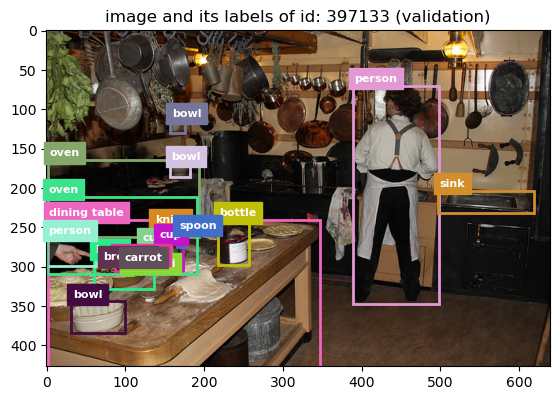

In [31]:
def show_image_and_labels_val(image_id):
    image_3d, image_2d = cv.open_image(base_path + validation_image_path + val_data_new[image_id]["file_name"])
    fig, ax = plt.subplots(figsize=(6.5, 6.5))

    plt.imshow(image_3d)

    for i in range(len(val_data_new[image_id]["annotations"])):
        color = (random.random(),random.random(),random.random())
        bbox = val_data_new[image_id]["annotations"][i]["bbox"]
        ax.add_patch(plt.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], fill=False, edgecolor=(color),linewidth=2))
        ax.text(bbox[0] + 2, bbox[1] - 5, val_data_new[image_id]["annotations"][i]["category_name"], color='white', fontsize=8, weight='bold', backgroundcolor=color)

    plt.title(f"image and its labels of id: {image_id} (validation)")

    plt.show()

show_image_and_labels_val(397133)

# __Image Processing__

For this experiment, we process the image by brightening, darkening, blurring and adding noise to the image and let the model predict it while we observe its performance. We then collect its result and compare it to the original image.

In [32]:
def brighten(image_2d, factor):
    new_image_2d = np.zeros(image_2d.shape, dtype=int)
    for i in range(image_2d.shape[0]):
        for j in range(image_2d.shape[1]):
            new_image_2d[i, j] = min(factor * image_2d[i, j], 255)

    new_image_2d[0, 0] = 0
    new_image_2d[0, 1] = 255

    return new_image_2d


def darken(image_2d, factor):
    new_image_2d = np.zeros(image_2d.shape, dtype=int)
    for i in range(image_2d.shape[0]):
        for j in range(image_2d.shape[1]):
            new_image_2d[i, j] = int(image_2d[i, j] / factor)

    new_image_2d[0, 0] = 0
    new_image_2d[0, 1] = 255

    return new_image_2d

def blur(image_2d, radius):
    kernel = np.ones((2 * radius + 1, 2 * radius + 1))
    new_image_2d = cv.convolve(image_2d, kernel)

    new_image_2d[0, 0] = 0
    new_image_2d[0, 1] = 255

    return new_image_2d

def salt_and_pepper_noise(image_2d, intensity):
    new_image_2d = np.copy(image_2d)
    
    for i in range(int(2 ** intensity)):
        rand0 = int(random.random() * image_2d.shape[0])
        rand1 = int(random.random() * image_2d.shape[1])

        if (random.random() < 0.5):
            new_image_2d[rand0, rand1] = 0
        else:
            new_image_2d[rand0, rand1] = 255

    new_image_2d[0, 0] = 0
    new_image_2d[0, 1] = 255

    return new_image_2d    

In [33]:
# helper functions

def open_image_val(id):
    image_3d, image_2d = cv.open_image(base_path + validation_image_path + val_data_new[id]["file_name"])
    return image_3d, image_2d

def helper_function_1(j):
    if j == 0:
        return image_2d, "original image"
    elif j == 1:
        return brighten(image_2d, 2.5), "brighten image"
    elif j == 2:
        return darken(image_2d, 2.5), "darken image"
    elif j == 3:
        return blur(image_2d, 3), "blurred image"
    elif j == 4:
        return salt_and_pepper_noise(image_2d, 15), "noisy image"
    elif j == 5:
        a = np.ones(image_2d.shape)
        a[0, 0] = 0
        return a, ""

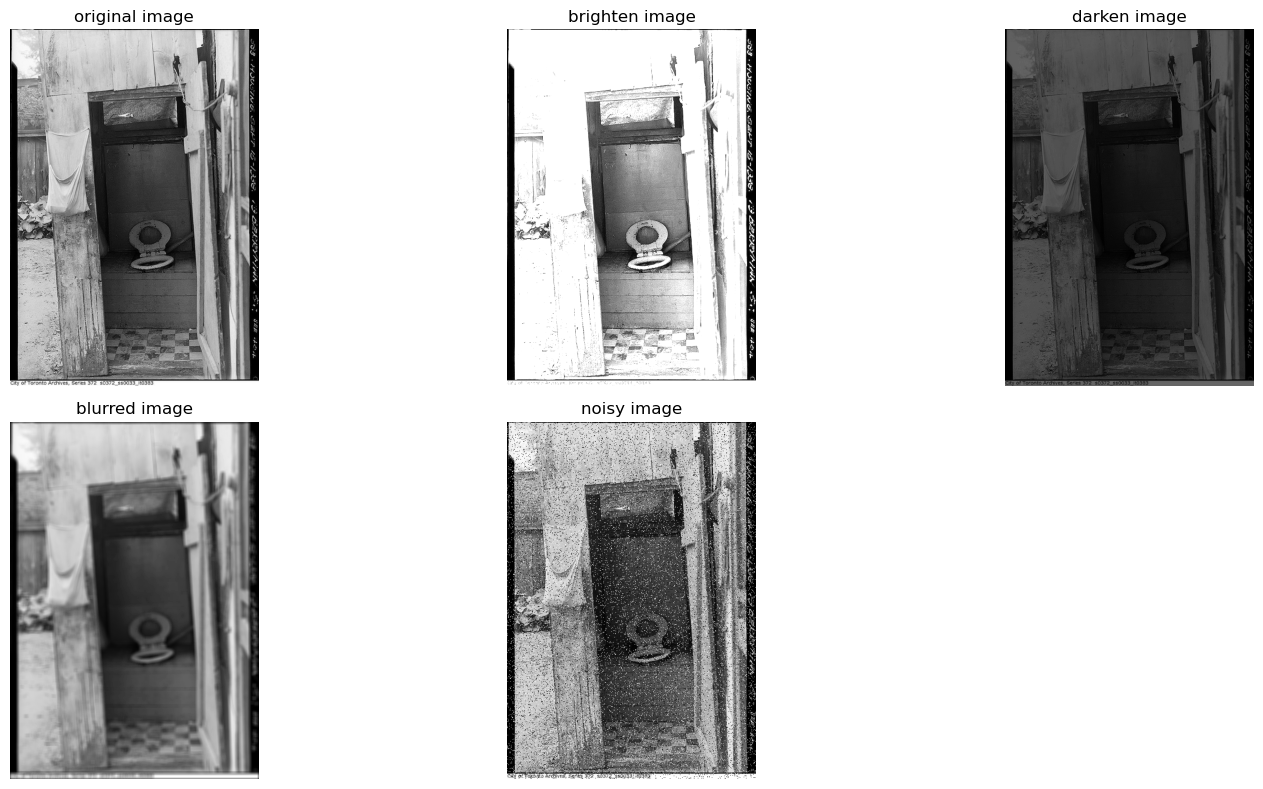

In [34]:
fig, ax = plt.subplots(2, 3, figsize=(17, 8))

for j in range(6):
    image, title = helper_function_1(j)

    a = j // 3
    b = j % 3

    ax[a, b].imshow(image, cmap="gray")
    ax[a, b].axis("off")
    ax[a, b].set_title(title)

plt.tight_layout()
plt.show()

Instead of running the experiment on the entire validation dataset, we take a subset of the dataset and use that instead, so that the code can run faster

In [35]:
# picking random samples from the validation dataset

sample_size = 500

sample_id_array = np.random.choice(val_image_id_array, sample_size)
print(len(val_image_id_array))
print(len(sample_id_array))

5000
500


In [37]:
model = torch.hub.load("ultralytics/yolov5", "yolov5s")
model.eval()

Using cache found in C:\Users\junmi/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-11-6 Python-3.10.9 torch-2.5.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

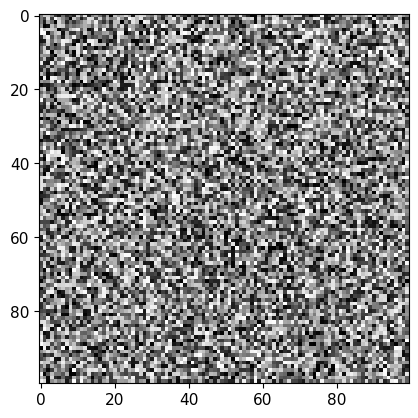

In [ ]:
a = np.random.rand(100,100)
plt.imshow(a,cmap="gray")
    